<a href="https://colab.research.google.com/github/Gabriela2685/Simulacion1/blob/main/Inventario_APCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de inventario

Carmen Gabriela Angulo Payán

Simulación de un inventario que inicia con 150 unidades, que mediante un numero aleatorio definimos cuantas unidades se van solicitando mes por mes, y los costos al final del año.

**Costos totales anuales del sistema de inventario**

Costo de ordenar = $100/orden

Costo de inventario = $20/unidad/año

Costo de faltante = $50/unidad

In [2]:
# Importamos librerias
import random as rnd
import math
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def asignar_valor(R, intervalos):           # Definimos una funcion que asigne el numero de demanda para cada mes
  for inicio, fin, valor in intervalos:     # en los intervalos que despues se proponen, a traves de un num aleatorio R
    if inicio <= R < fin:
      return valor
  return None

In [4]:
def tiempo_entrega(R, T_entrega):           # Definimos una funcion que asigne el tiempo que va a tardar cada orden
  for inicio, fin, valor in T_entrega:      # A traves de un numero aleatorio R
    if inicio <= R < fin:
      return valor
  return None

In [11]:
def Inv_entario(Inv_I,q,Reor):                         # Definimos nuestra funcion de inventario ocupa los sig. aparametros: Inventario inicial, cantidad y punto de reorden
    valores_meses = [                                  # Factor estacional que le corresponde a cada mes
        (1, 1.2), (2, 1.00), (3, 0.90), (4, 0.80),
        (5, 0.80), (6, 0.70), (7, 0.80), (8, 0.90),
        (9, 1.00), (10, 1.20), (11, 1.30), (12, 1.40)
    ]

    intervalos = [                                     # Dependiendo de donde caiga mi R se le asigna un valor a x
        (0.000, 0.010, 35), (0.010, 0.025, 36), (0.025, 0.045, 37),
        (0.045, 0.065, 38), (0.065, 0.087, 39), (0.087, 0.110, 40),
        (0.110, 0.135, 41), (0.135, 0.162, 42), (0.162, 0.190, 43),
        (0.190, 0.219, 44), (0.219, 0.254, 45), (0.254, 0.299, 46),
        (0.299, 0.359, 47), (0.359, 0.424, 48), (0.424, 0.494, 49),
        (0.494, 0.574, 50), (0.574, 0.649, 51), (0.649, 0.719, 52),
        (0.719, 0.784, 53), (0.784, 0.844, 54), (0.844, 0.894, 55),
        (0.894, 0.934, 56), (0.934, 0.964, 57), (0.964, 0.980, 58),
        (0.980, 0.995, 59), (0.995, 1.000, 60),
    ]

    T_entrega = [                                       # Dependiendo de donde caiga R se aigna un tiempo de llegada a la orden
        (0.00, 0.30, 1), (0.30, 0.70, 2), (0.70, 1.00, 3),
    ]

    #Inv_I = 150               # Inventario inicial
    Ordenes = 0               # Contador para las ordenes que se generen
    Pedido_pendiente = 0      # Contador para los pedidos pendientes
    Mes_pedido = {}
    Faltante = 0              # Contador para los faltantes

    Mes = []
    Inv_inicial = []
    Num_aleatorio = []
    Dem_ajustada = []
    Inv_final = []
    Faltantes = []
    Num_orden = []
    Inv_promedio = []

    # Usamos un bucle for para trabajar del mes 1 al 12
    for mes, valor in valores_meses:
        R = rnd.random()                      # Generamos un valor aleatorio R entre 0 y 1
        x = asignar_valor(R, intervalos)      # Asignamos el valor de la demanda
        DAj = valor * x                       # Ajuste de la demanda (Se aplica el factor estacional)
        Dem_ajust = math.floor(DAj)           # Redondeamos

        # Agregamos las 200 piezas en el mes correspondiente
        if mes in Mes_pedido:
            Inv_I += Mes_pedido[mes]
            Pedido_pendiente -= Mes_pedido[mes]
            del Mes_pedido[mes]

        Inv_inicial.append(Inv_I)

        Inv_F = Inv_I - Dem_ajust

        # Si el Inventario F es negativo...
        if Inv_F < 0:
            Faltante += abs(Inv_F)  # Se agregara al contador de faltantes
            Inv_F = 0     # Por lo tanto el inventario pasara a 0
        else:
            Faltante = 0  # Resetear faltante si no hay faltante

        # Si en Inventario F es menor a 100
        if Inv_F < Reor:
            Ordenes += 1
            Pedido_pendiente += q
            t = tiempo_entrega(R, T_entrega)
            mes_entrega = mes + t
            if mes_entrega in Mes_pedido:
                Mes_pedido[mes_entrega] += q

            else:
                Mes_pedido[mes_entrega] = q

        # Obtenemos el inventario promedio...
        if Inv_F == 0:   # Cuando el inventario final es 0 se ajusta la fórmula
          IP = (Inv_I/2) * (Inv_I/Dem_ajust)
          Inv_Prom = math.ceil(IP)
        else:
          IP = (Inv_I + Inv_F)/2
          Inv_Prom = math.ceil(IP)

        #print(f"Mes: {mes}, Dem_ajust: {Dem_ajust}, II: {Inv_I}, IF: {Inv_F}, Falt: {Faltante}, InvProm:{Inv_Prom}, Orden: {Ordenes}, Pedidos Pendientes: {Mes_pedido}")

        # Guardar los datos en las listas
        Mes.append(mes)
        Num_aleatorio.append(R)
        Dem_ajustada.append(Dem_ajust)
        Inv_final.append(Inv_F)
        Faltantes.append(Faltante)
        Num_orden.append(Ordenes)
        Inv_promedio.append(Inv_Prom)

        Inv_I = Inv_F - Faltante  # Ajustar Inv_I restando el faltante

    # Creamos la tabla
    data = {
        'Mes': Mes,
        'Inv_inicial': Inv_inicial,
        'Num_aleatorio': Num_aleatorio,
        'Dem_ajustada': Dem_ajustada,
        'Inv_final': Inv_final,
        'Faltantes': Faltantes,
        'Num_orden': Num_orden,
        'Inv_promedio': Inv_promedio
    }

    df = pd.DataFrame(data)

    print(df.to_string(index=False))

    print()

    # Costos anuales
    Cost_Ord = 100
    Cost_Inv = 1.67
    Cost_faltante = 50

    Ord = set(Num_orden)
    Ordenes_total = sum(Ord)*Cost_Ord
    Faltante_total = sum(Faltantes)*Cost_faltante
    InvP_total = sum(Inv_promedio)*Cost_Inv
    Total = Ordenes_total+InvP_total+Faltante_total

    print('Costo de ordenar: $',Ordenes_total)
    print('Costo de inventario: $',"{:.2f}".format(InvP_total))
    print('Costo faltante: $',Faltante_total)
    print('Total: $',"{:.2f}".format(Total))

    # Grafico
    plt.plot(Mes,Inv_inicial,marker='o')
    plt.xlim(0, max(Mes)+1)
    plt.title('Gráfico del inventario')
    plt.xlabel('Mes')
    plt.ylabel('q')
    plt.axhline(Reor, color='black', label='Reorden')
    plt.legend()
    plt.grid(True)

 Mes  Inv_inicial  Num_aleatorio  Dem_ajustada  Inv_final  Faltantes  Num_orden  Inv_promedio
   1          150       0.910024            67         83          0          1           117
   2           83       0.950476            57         26          0          2            55
   3           26       0.895208            50          0         24          3             7
   4          176       0.183724            34        142          0          3           159
   5          342       0.981182            47        295          0          3           319
   6          495       0.478985            34        461          0          3           478
   7          461       0.489675            39        422          0          3           442
   8          422       0.546943            45        377          0          3           400
   9          377       0.837238            54        323          0          3           350
  10          323       0.192110            52        271   

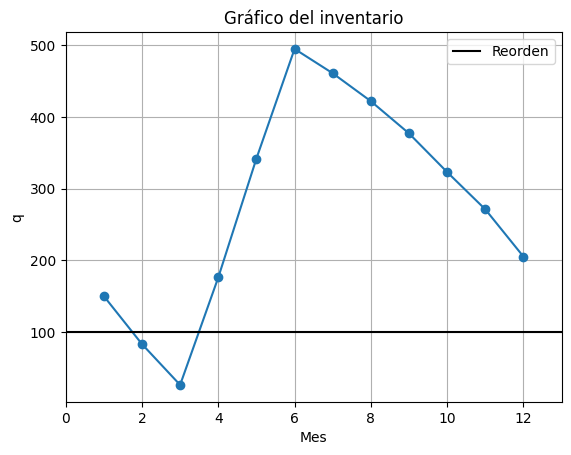

In [12]:
Inv_entario(150,200,100)